In [157]:
import numpy as np
import pandas as pd
from scrapy.selector import Selector
from selenium import webdriver 
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import matplotlib.pyplot as plt
import seaborn as sns
import time
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [21]:
from selenium import webdriver

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('C:/Users/Admin/chromedriver.exe')  # Replace with the actual path

driver = webdriver.Chrome(options=chrome_options)

# Now you can use driver to interact with the web page
driver.get('https://www.imdb.com/title/tt9603212/reviews/?ref_=tt_ql_2')


body = driver.find_element(By.CSS_SELECTOR, 'body')
body.send_keys(Keys.PAGE_DOWN)
body.send_keys(Keys.PAGE_DOWN)
body.send_keys(Keys.PAGE_DOWN)





In [22]:
sel = Selector(text = driver.page_source)
review_counts = sel.css('.lister .header span::text').extract_first().replace(',','').split(' ')[0]
more_review_pages = int(int(review_counts)/25)


In [55]:
for i in tqdm(range(more_review_pages)):
    try:
        css_selector = 'load-more-trigger'
        driver.find_element(By.ID, css_selector).click()
        time.sleep(5)
    except:
        pass

100%|██████████████████████████████████████████████████████████████████████████████████| 38/38 [02:26<00:00,  3.87s/it]


In [56]:
review = sel.css('.text.show-more__control::text').extract_first().strip()
review_date = sel.css('.review-date::text').extract_first().strip()
rating = sel.css('.rating-other-user-rating span::text').extract_first().strip()
author = sel.css('.display-name-link a::text').extract_first().strip()
review_title = sel.css('a.title::text').extract_first().strip()
review_url = sel.css('a.title::attr(href)').extract_first().strip()
helpfulness = sel.css('.actions.text-muted::text').extract_first().strip()

print('review_title:',review_title)
print('\nAuthor:',author)
print('\nRating:',rating)
print('\nreview_date:',review_date)
print('\nreview:',review)
print('\nhelpfulness:',helpfulness)

review_title: Mission: Impossible - Dead Reckoning (Part One) boasts some of cinema's most stunning stunt work, but it came at the cost of character development and a solid story.

Author: Paragon240

Rating: 7

review_date: 12 July 2023

review: Man.... I wish I loved this movie more than I did. Don't get me wrong, it's a solid action movie with jaw-dropping stunts (some of the best in the series), but as a Mission: Impossible movie, it felt like a small step backward for the franchise. Fallout had mind-blowing action sequences and stunt work, along with developing Ethan's relationship with Ilsa, providing closure with Julia, showing the lengths Ethan would go to protect those closest to him, and battling an imposing villain. Dead Reckoning: Part One stretches the movie across two films only to seemingly showcase action spectacle after action spectacle while sacrificing character development. Characters I have grown to love over a decade of films felt sidelined, ignored, or wasted. Ha

In [126]:
rating_list = []
review_date_list = []
review_title_list = []
author_list = []
review_list = []
review_url_list = []
error_url_list = []
error_msg_list = []
reviews = driver.find_elements(By.CSS_SELECTOR, 'div.review-container')

def extract_data(selector, css_selector):
    try:
        return selector.css(css_selector).extract_first()
    except:
        return np.NaN
for d in tqdm(reviews):
    sel2 = Selector(text=d.get_attribute('innerHTML'))
    rating = extract_data(sel2, '.rating-other-user-rating span::text')
    review = extract_data(sel2, '.text.show-more__control::text')
    review_date = extract_data(sel2, '.review-date::text')
    author = extract_data(sel2, '.display-name-link a::text')
    review_title = extract_data(sel2,'a.title::text')
    review_url = extract_data(sel2,'a.title::attr(href)')
    rating_list.append(rating)
    review_date_list.append(review_date)
    review_title_list.append(review_title)
    author_list.append(author)
    review_list.append(review)
    review_url_list.append(review_url)

100%|████████████████████████████████████████████████████████████████████████████████| 957/957 [00:22<00:00, 41.74it/s]


In [132]:
review_df = pd.DataFrame({
    'Review_Date':review_date_list,
    'Author':author_list,
    'Rating':rating_list,
    'Review_Title':review_title_list,
    'Review':review_list,
    'Review_Url':review_url
    })

In [133]:
review_df.head()

,Review_Date,Author,Rating,Review_Title,Review,Review_Url
0,12 July 2023,Paragon240,7,Mission: Impossible - Dead Reckoning (Part On...,Man.... I wish I loved this movie more than I ...,/review/rw9241774/?ref_=tt_urv
1,8 July 2023,jackreinbott,9,Tom Cruise just gets it...\n,"Just saw this one in a theatre, and boy... wha...",/review/rw9241774/?ref_=tt_urv
2,10 July 2023,masonsaul,10,Best franchise currently going\n,Mission: Impossible - Dead Reckoning Part One ...,/review/rw9241774/?ref_=tt_urv
3,8 July 2023,MFC9,9,Tom still The King\n,Good God. I feel ashamed for approaching this ...,/review/rw9241774/?ref_=tt_urv
4,12 July 2023,subxerogravity,9,I think Tom Cruse may have single handily sav...,This latest Mission: Impossible movie is a sla...,/review/rw9241774/?ref_=tt_urv


In [137]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 938 entries, 0 to 956
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review_Date   938 non-null    object
 1   Author        938 non-null    object
 2   Rating        938 non-null    object
 3   Review_Title  938 non-null    object
 4   Review        938 non-null    object
 5   Review_Url    938 non-null    object
dtypes: object(6)
memory usage: 51.3+ KB


In [143]:
review_df.drop('Review_Url', axis=1)

,Review_Number,Review_Date,Author,Rating,Review_Title,Review
0,1,12 July 2023,Paragon240,7,Mission: Impossible - Dead Reckoning (Part On...,Man.... I wish I loved this movie more than I ...
1,2,8 July 2023,jackreinbott,9,Tom Cruise just gets it...\n,"Just saw this one in a theatre, and boy... wha..."
2,3,10 July 2023,masonsaul,10,Best franchise currently going\n,Mission: Impossible - Dead Reckoning Part One ...
3,4,8 July 2023,MFC9,9,Tom still The King\n,Good God. I feel ashamed for approaching this ...
4,5,12 July 2023,subxerogravity,9,I think Tom Cruse may have single handily sav...,This latest Mission: Impossible movie is a sla...
...,...,...,...,...,...,...
952,934,27 July 2023,jaykubbe,3,Part 2 probably not necessary.\n,Rouge Nation and Fallout are amongst my favori...
953,935,14 July 2023,shristisharma-40196,9,Nice movie\n,Worth for watching best action by Tom cruise ....
954,936,17 July 2023,cookiemovies,7,Is the M:I franchise on the decline?\n,Since Tom Cruise teamed up with director Chris...
955,937,24 July 2023,deborahd-54354,7,No clever dialogue\n,"Definitely an action packed movie, but in the ..."


In [130]:
review_df.isnull().sum()

Review_Date      0
Author           0
Rating          19
Review_Title     0
Review           0
Review_Url       0
dtype: int64

In [135]:
import pandas as pd

# Assuming you have a DataFrame named review_df

# Drop rows where 'Rating' column is null
review_df.dropna(subset=['Rating'], how='any', inplace=True)



In [136]:
review_df.isnull().sum()

Review_Date     0
Author          0
Rating          0
Review_Title    0
Review          0
Review_Url      0
dtype: int64

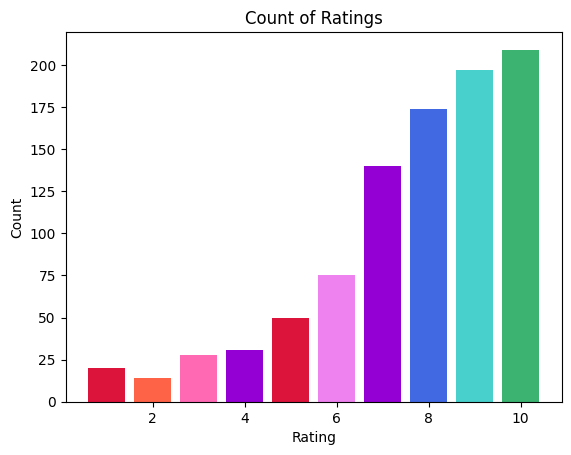

In [110]:
review_df['Rating'] = review_df['Rating'].astype(int)

# Count the occurrences of each rating
rating_counts = review_df['Rating'].value_counts().sort_index()


# Create a list of colors for each rating (you can customize this)
colors = ['crimson', 'tomato', 'hotpink', 'darkviolet', 'crimson', 'violet', 'darkviolet', 'royalblue', 'mediumturquoise', 'mediumseagreen']

# Create a bar plot
plt.bar(rating_counts.index, rating_counts.values, color=colors)

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count of Ratings')

# Show the plot
plt.show()



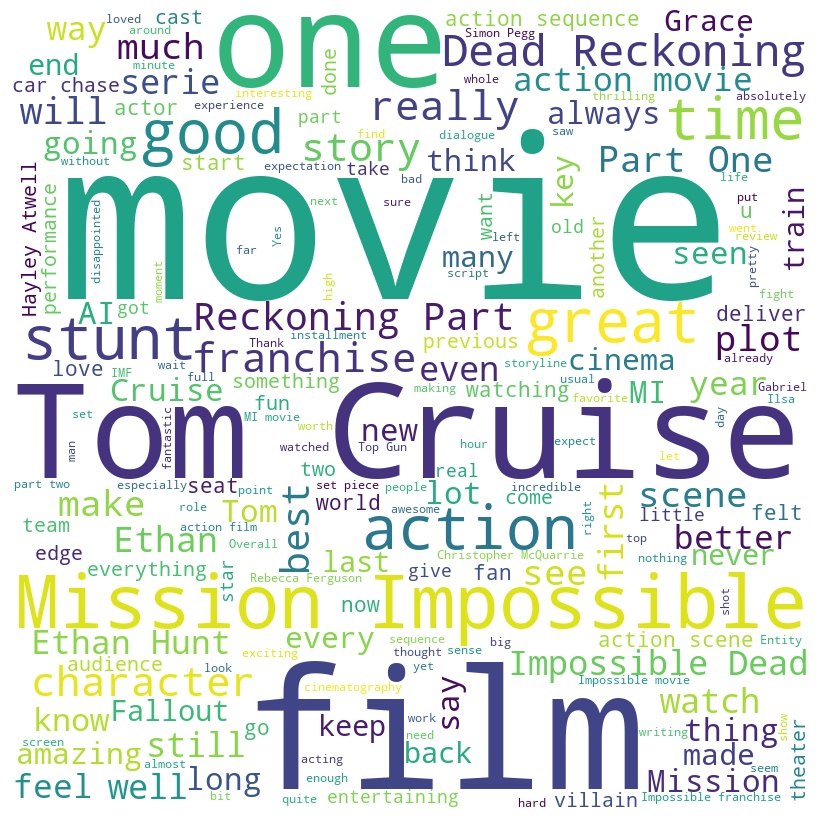

In [112]:
all_reviews = ' '.join(review_df['Review'])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      min_font_size=10).generate(all_reviews)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [138]:
df = pd.DataFrame(review_df)

# Add a new column 'Review_Number' with values from 1 to the length of the DataFrame

df.insert(0, 'Review_Number', range(1, len(df) + 1))



In [145]:
review_df.head()


,Review_Number,Review_Date,Author,Rating,Review_Title,Review,Review_Url
0,1,12 July 2023,Paragon240,7,Mission: Impossible - Dead Reckoning (Part On...,Man.... I wish I loved this movie more than I ...,/review/rw9241774/?ref_=tt_urv
1,2,8 July 2023,jackreinbott,9,Tom Cruise just gets it...\n,"Just saw this one in a theatre, and boy... wha...",/review/rw9241774/?ref_=tt_urv
2,3,10 July 2023,masonsaul,10,Best franchise currently going\n,Mission: Impossible - Dead Reckoning Part One ...,/review/rw9241774/?ref_=tt_urv
3,4,8 July 2023,MFC9,9,Tom still The King\n,Good God. I feel ashamed for approaching this ...,/review/rw9241774/?ref_=tt_urv
4,5,12 July 2023,subxerogravity,9,I think Tom Cruse may have single handily sav...,This latest Mission: Impossible movie is a sla...,/review/rw9241774/?ref_=tt_urv


In [151]:
df.head()

,Review_Number,Review_Date,Author,Rating,Review_Title,Review,Review_Url
0,1,12 July 2023,Paragon240,7,Mission: Impossible - Dead Reckoning (Part On...,Man.... I wish I loved this movie more than I ...,/review/rw9241774/?ref_=tt_urv
1,2,8 July 2023,jackreinbott,9,Tom Cruise just gets it...\n,"Just saw this one in a theatre, and boy... wha...",/review/rw9241774/?ref_=tt_urv
2,3,10 July 2023,masonsaul,10,Best franchise currently going\n,Mission: Impossible - Dead Reckoning Part One ...,/review/rw9241774/?ref_=tt_urv
3,4,8 July 2023,MFC9,9,Tom still The King\n,Good God. I feel ashamed for approaching this ...,/review/rw9241774/?ref_=tt_urv
4,5,12 July 2023,subxerogravity,9,I think Tom Cruse may have single handily sav...,This latest Mission: Impossible movie is a sla...,/review/rw9241774/?ref_=tt_urv


In [152]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [153]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Review']
    myid = row['Review_Number']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/938 [00:00<?, ?it/s]

In [154]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Review_Number'})
vaders = vaders.merge(df, how='left')

In [155]:
vaders.head()

,Review_Number,neg,neu,pos,compound,Review_Date,Author,Rating,Review_Title,Review,Review_Url
0,1,0.152,0.664,0.184,0.6130,12 July 2023,Paragon240,7,Mission: Impossible - Dead Reckoning (Part On...,Man.... I wish I loved this movie more than I ...,/review/rw9241774/?ref_=tt_urv
1,2,0.053,0.826,0.121,0.9051,8 July 2023,jackreinbott,9,Tom Cruise just gets it...\n,"Just saw this one in a theatre, and boy... wha...",/review/rw9241774/?ref_=tt_urv
2,3,0.090,0.683,0.227,0.8910,10 July 2023,masonsaul,10,Best franchise currently going\n,Mission: Impossible - Dead Reckoning Part One ...,/review/rw9241774/?ref_=tt_urv
3,4,0.091,0.739,0.170,0.7546,8 July 2023,MFC9,9,Tom still The King\n,Good God. I feel ashamed for approaching this ...,/review/rw9241774/?ref_=tt_urv
4,5,0.070,0.819,0.110,0.7003,12 July 2023,subxerogravity,9,I think Tom Cruse may have single handily sav...,This latest Mission: Impossible movie is a sla...,/review/rw9241774/?ref_=tt_urv


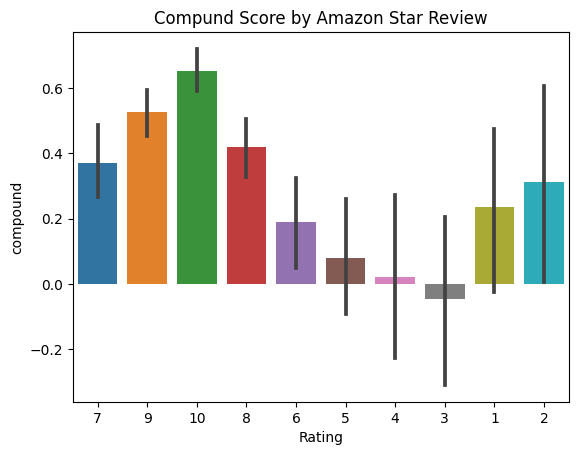

In [162]:
ax = sns.barplot(data=vaders, x='Rating', y='compound')

ax.set_title('Compund Score by Amazon Star Review')
plt.show()

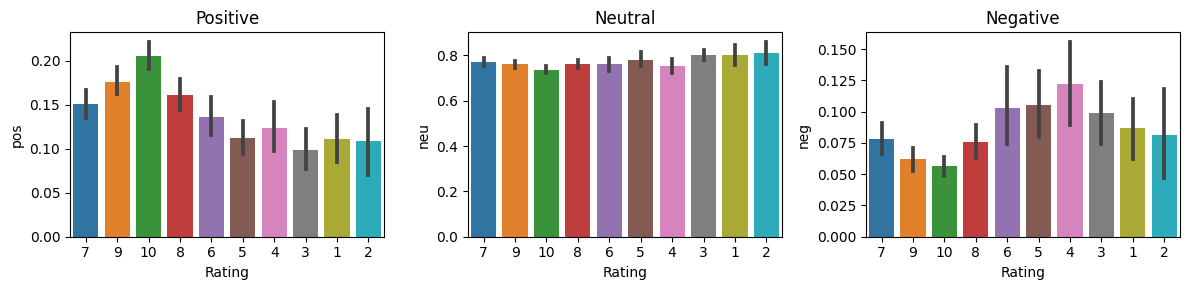

In [163]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [165]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [166]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [168]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [170]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Review']
        myid = row['Review_Number']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  1%|▊                                                                                 | 9/938 [00:05<08:51,  1.75it/s]

Broke for id 9


  1%|▊                                                                                | 10/938 [00:05<07:57,  1.94it/s]

Broke for id 11
Broke for id 12


 12%|█████████▊                                                                      | 115/938 [01:02<06:04,  2.26it/s]

Broke for id 116


 37%|█████████████████████████████▎                                                  | 344/938 [03:10<05:59,  1.65it/s]

Broke for id 345


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [09:15<00:00,  1.69it/s]


In [172]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Review_Number'})
results_df = results_df.merge(df, how='left')

In [173]:
results_df.head()

,Review_Number,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Review_Date,Author,Rating,Review_Title,Review,Review_Url
0,1,0.152,0.664,0.184,0.6130,0.193478,0.415154,0.391369,12 July 2023,Paragon240,7,Mission: Impossible - Dead Reckoning (Part On...,Man.... I wish I loved this movie more than I ...,/review/rw9241774/?ref_=tt_urv
1,2,0.053,0.826,0.121,0.9051,0.001727,0.007888,0.990384,8 July 2023,jackreinbott,9,Tom Cruise just gets it...\n,"Just saw this one in a theatre, and boy... wha...",/review/rw9241774/?ref_=tt_urv
2,3,0.090,0.683,0.227,0.8910,0.007494,0.048196,0.944310,10 July 2023,masonsaul,10,Best franchise currently going\n,Mission: Impossible - Dead Reckoning Part One ...,/review/rw9241774/?ref_=tt_urv
3,4,0.091,0.739,0.170,0.7546,0.101883,0.203491,0.694627,8 July 2023,MFC9,9,Tom still The King\n,Good God. I feel ashamed for approaching this ...,/review/rw9241774/?ref_=tt_urv
4,5,0.070,0.819,0.110,0.7003,0.041925,0.353397,0.604677,12 July 2023,subxerogravity,9,I think Tom Cruse may have single handily sav...,This latest Mission: Impossible movie is a sla...,/review/rw9241774/?ref_=tt_urv


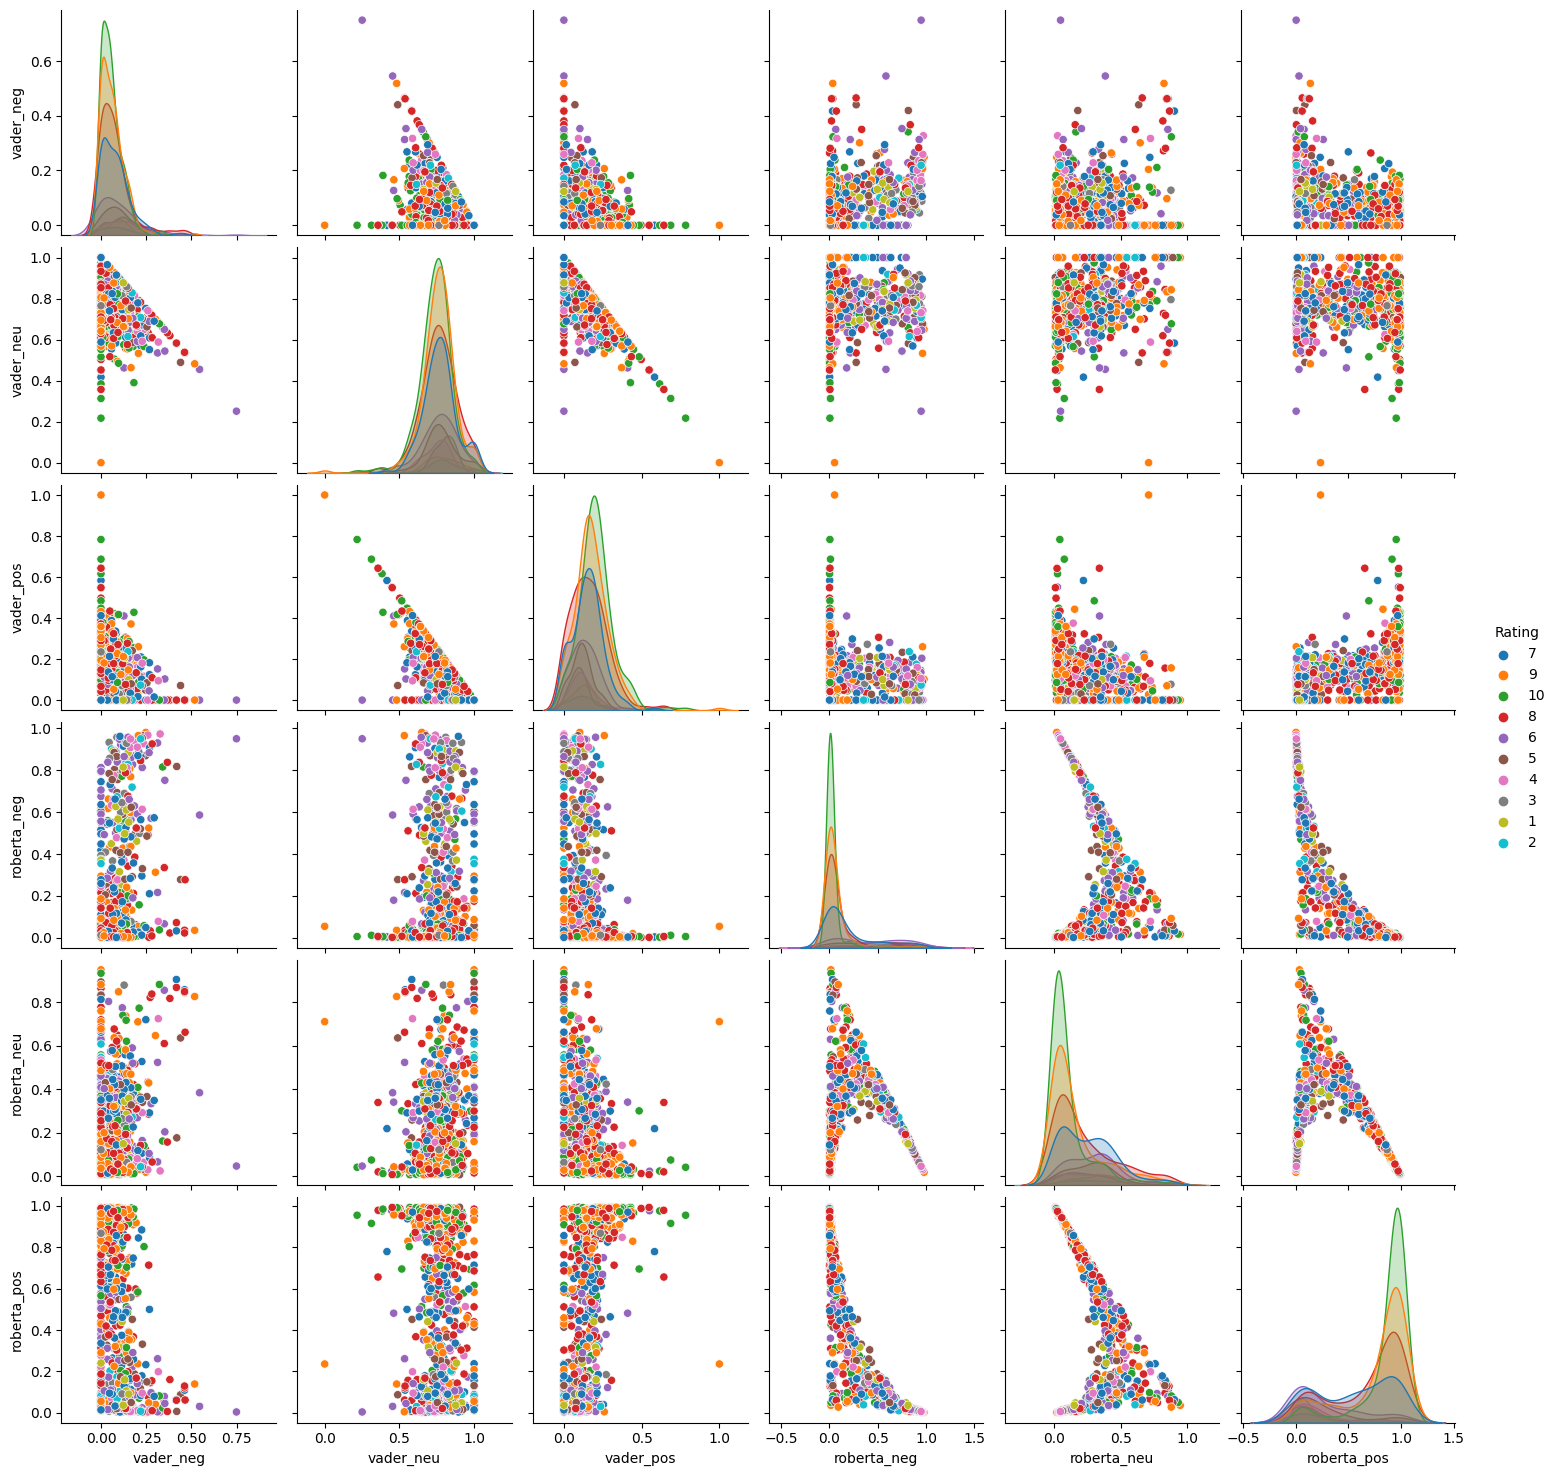

In [174]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Rating',
            palette='tab10')
plt.show()

In [179]:
results_df.columns

Index(['Review_Number', 'vader_neg', 'vader_neu', 'vader_pos',
       'vader_compound', 'roberta_neg', 'roberta_neu', 'roberta_pos',
       'Review_Date', 'Author', 'Rating', 'Review_Title', 'Review',
       'Review_Url'],
      dtype='object')

In [204]:
from transformers import pipeline

# Load the sentiment analysis pipeline
sent_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

transformer_df = df[df['Review'].apply(lambda x: len(sent_pipeline.tokenizer(x)['input_ids']) <= 512)]

sentiment_results = transformer_df['Review'].apply(lambda x: sent_pipeline(x)[0])

# Create separate columns for sentiment label and score
transformer_df['sentiment_label'] = [result['label'] for result in sentiment_results]
transformer_df['sentiment_score'] = [result['score'] for result in sentiment_results]



Token indices sequence length is longer than the specified maximum sequence length for this model (548 > 512). Running this sequence through the model will result in indexing errors


In [205]:
transformer_df

,Review_Number,Review_Date,Author,Rating,Review_Title,Review,Review_Url,sentiment_label,sentiment_score
0,1,12 July 2023,Paragon240,7,Mission: Impossible - Dead Reckoning (Part On...,Man.... I wish I loved this movie more than I ...,/review/rw9241774/?ref_=tt_urv,3 stars,0.431850
1,2,8 July 2023,jackreinbott,9,Tom Cruise just gets it...\n,"Just saw this one in a theatre, and boy... wha...",/review/rw9241774/?ref_=tt_urv,5 stars,0.856593
2,3,10 July 2023,masonsaul,10,Best franchise currently going\n,Mission: Impossible - Dead Reckoning Part One ...,/review/rw9241774/?ref_=tt_urv,5 stars,0.564420
3,4,8 July 2023,MFC9,9,Tom still The King\n,Good God. I feel ashamed for approaching this ...,/review/rw9241774/?ref_=tt_urv,5 stars,0.730415
4,5,12 July 2023,subxerogravity,9,I think Tom Cruse may have single handily sav...,This latest Mission: Impossible movie is a sla...,/review/rw9241774/?ref_=tt_urv,4 stars,0.338448
...,...,...,...,...,...,...,...,...,...
952,934,27 July 2023,jaykubbe,3,Part 2 probably not necessary.\n,Rouge Nation and Fallout are amongst my favori...,/review/rw9241774/?ref_=tt_urv,4 stars,0.595463
953,935,14 July 2023,shristisharma-40196,9,Nice movie\n,Worth for watching best action by Tom cruise ....,/review/rw9241774/?ref_=tt_urv,5 stars,0.745912
954,936,17 July 2023,cookiemovies,7,Is the M:I franchise on the decline?\n,Since Tom Cruise teamed up with director Chris...,/review/rw9241774/?ref_=tt_urv,4 stars,0.496193
955,937,24 July 2023,deborahd-54354,7,No clever dialogue\n,"Definitely an action packed movie, but in the ...",/review/rw9241774/?ref_=tt_urv,3 stars,0.686621
